# Chapter 3. 회귀 알고리즘, 모델 규제

## 기초 지식
### 회귀 vs 분류
- 아웃풋이 연속형인 값을 예측할 때는 회귀

![alt text](appendix/image-1.png)

- 아웃풋이 카테고리컬인 값을 예측할 때는 분류

![alt text](appendix/image.png)

- 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율: 정확도로 모델 평가
- 회귀 모델의 경우 결정계수(Coeffcient of determination) $R^2$으로 표현

$$
R^2 = 1 - \frac{(타깃 - 예측)^2의 합}{(타깃 - 평균)^2의 합}
$$
- 혹은 회귀 모델에서 `mean_absolute_error`는 타깃과 예측의 절댓값 오차를 평균하여 계싼

### 과소 적합의 사유
- 훈련 세트와 테스트 세트의 크기가 매우 작기 때문
- 데이터가 작으면 테스트 세트가 훈련 세트의 특징을 따르지 못할 수 있음.

## Library, Data Import

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression


In [2]:
df1 = pd.read_csv('/home/user/python_practice/mldl_practice/book_practice/Fish.csv')

In [24]:
# 농어 데이터 추출
df1_perch = (
    df1.query('Species == "Perch"').assign(Length = lambda x : x[['Length1', 'Length2', 'Length3']].mean(axis=1).round(2))
    [['Species', 'Weight', 'Length', 'Height', 'Width']]
)

In [25]:
perch_length = np.array(df1_perch['Length'])
perch_weight = np.array(df1_perch['Weight'])

"""
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
"""

print(perch_length)
print(perch_weight)

[ 8.23 13.63 14.93 16.13 17.2  17.8  18.3  18.8  19.4  19.73 20.83 20.83
 20.83 21.13 21.83 21.83 21.83 21.83 21.83 22.33 22.33 22.53 22.83 23.33
 23.83 23.83 24.47 24.83 25.37 26.5  27.07 27.27 27.27 27.27 27.77 28.57
 29.8  32.43 34.33 34.93 36.5  36.1  36.97 36.97 38.97 38.97 38.97 39.73
 39.83 39.8  39.87 41.87 42.67 42.87 43.23 43.9 ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


## 데이터 확인

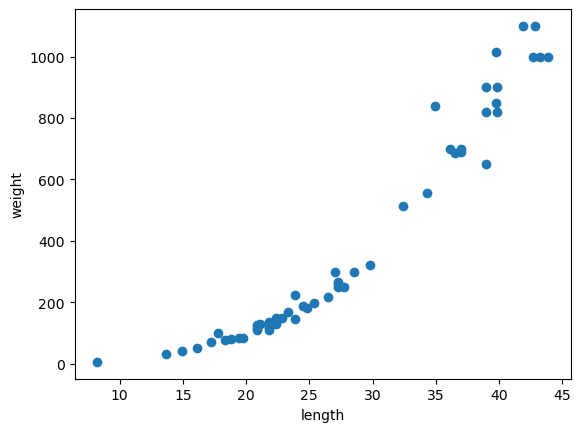

In [26]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 추억의 2차함수 모양이 보임

## Train, test

In [28]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [8]:
train_input

array([19.4, 21.8, 18.3, 17.2, 36.1, 24.8, 39.7, 39. , 42.7, 21.8, 19.7,
       21.8, 23.8, 27.3, 42.9, 39.8, 23.8, 20.8, 27.3, 39.8, 32.4, 26.5,
       36.5, 13.6, 22.5, 14.9, 37. , 34.9, 28.6, 23.3, 39. , 20.8, 22.8,
       21.8, 43.9, 22.3, 18.8, 37. , 21.8, 25.4, 41.9, 34.3])

### 1차원 array에서 2차원($1 \times n$) array로 변경

In [29]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [31]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 모델링

In [32]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)


KNeighborsRegressor()

In [12]:
print(knr.score(test_input, test_target))

0.9926919864582844


In [13]:
mean_absolute_error(test_target, knr.predict(test_input))

19.22857142857143

- 결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있음

### Overfitting, Underfitting
- Overfitting: 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁨
- Underfitting: 두 점수가 모두 너무 낮은 경우
(훈련 세트보다 테스트 세트의 점수가 높은 경우는 추가적으로 원인 파악 필요)

- 과대적합일 경우 모델을 덜 복잡하게 만들어야 함
 k-최근접 이웃의 경우 k 값을 늘립니다. 
- 과소 적합일 경우 모델을 더 복잡하게 만들어야 합니다

- **상기 내용은 다시한번추가적인 확인이 반드시 필요**
- `for`나 `while`등을 통해 여러 파라미터 진행 

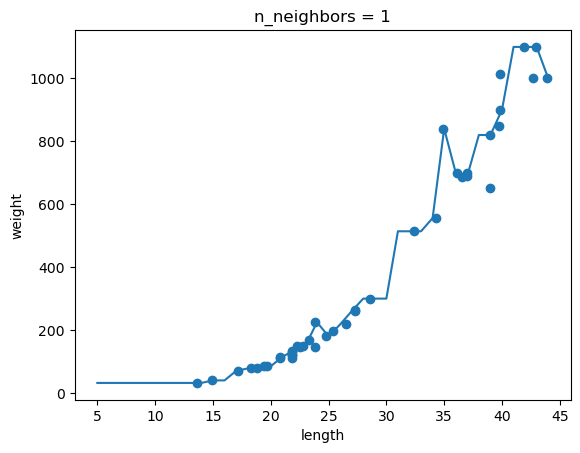

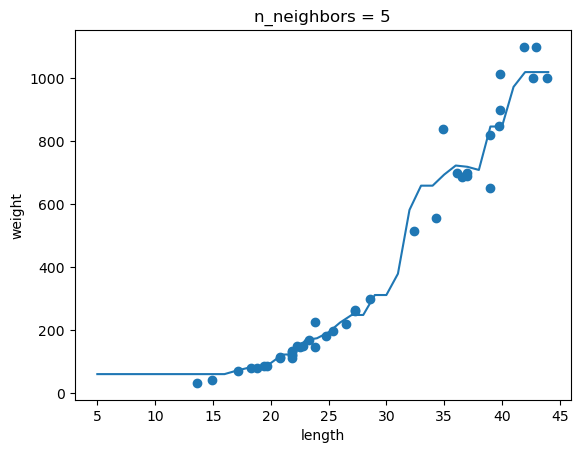

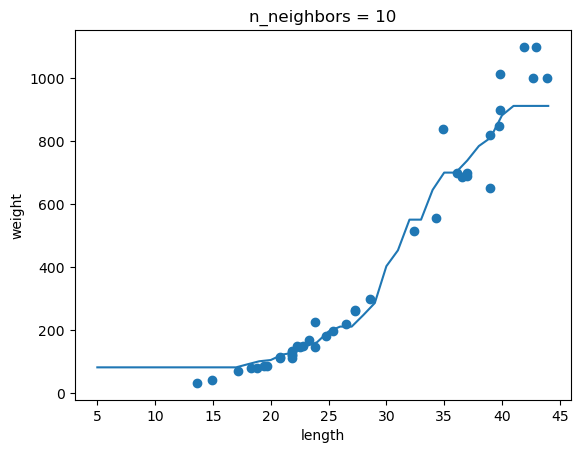

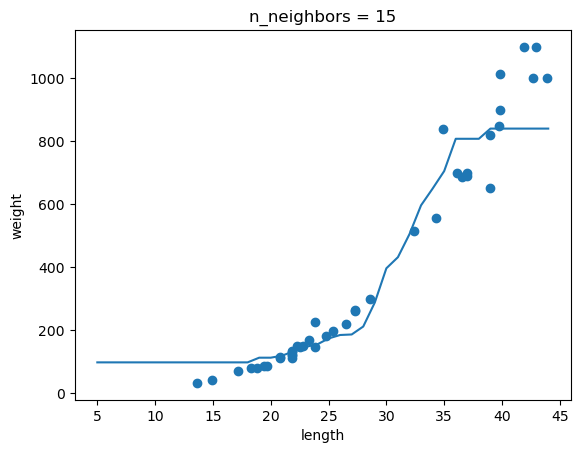

In [14]:
# for문을 이용하여 파라미터값에 따른 모델 결과
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10, 15]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

    plt.scatter(train_input, train_target) 
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

## 03-2. Linear Regression
### 들어가기 앞서
- 현재 연습 데이터 기준 feature 1개, output 1개로만 보기 때문에 Scatter plot을 통해 데이터이 분포를 확인 할 수 있지만..
- feature가 여러개로 들어가 차원이 높아지는 경우 scatter plot을 통해 확인하기 어려운 경우가 있음
- 그럴 때는 ml이나 dl 등 여러가지 방법론들을 잘 익혀 현재 데이터를 분석하기에 알맞는 방법들을 추린 후 일단 돌려본 후 생각하느게 빠를 수도 있음 

### k-nn 한계점
#### k-nn parameter = 3 모델
- 최적 파라미터 값 (`n-neighbors`) 구하는 방법은 다음을 참고 

In [46]:
# 모델 학습 및 결과
knr3 = KNeighborsRegressor(n_neighbors=3)
knr3.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [47]:
print(knr3.predict([[50]]))

[1033.33333333]


- 지금 50cm 농어 무게를 1033g정도로 예측했는데, 실제로는 훨씬 더 많이 나간다고 함
- 일단 plot을 그려보려함

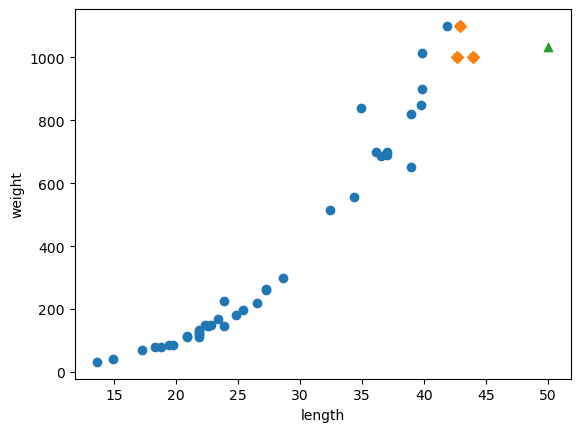

In [48]:

 # 50cm 농어의 이웃을 구합니다
distances3, indexes3 = knr3.kneighbors([[50]])
 # 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes3], train_target[indexes3], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


- scatter plot 결과, 삼각혀이랑 selection된 샘플이 다소 떨어져 있는 값임을 확인(이상치 인지는 물고기 관련 도메인이 없으니 섣부른 판단 금지)
- 100cm 짜리 한번더 예측해보고 그래프에 표현해보죠.

In [49]:
print(knr3.predict([[100]]))

[1033.33333333]


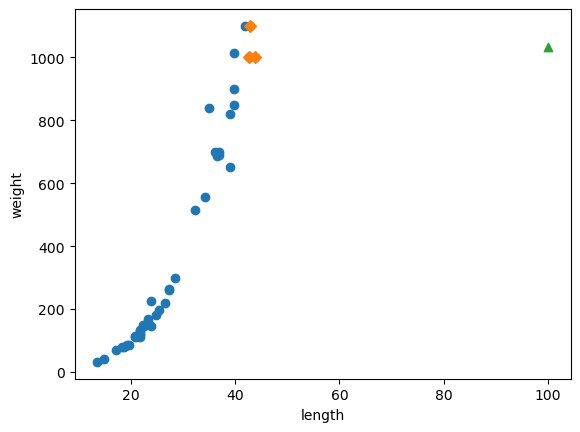

In [50]:
distance, indexes = knr3.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 현재 해당 plot으로 보아 **100cm인 농어도** 가장 가까운 놈들을 골라주는 **k-nn의 알고리즘 특성에 따라 훈련 데이터에서 가장 큰 값인 1033.3 값을 동일하게** 내뱉어버림
- 길이가 넘쳐나는 농어 데이터가 있는걸 재학습 시키거나, 다른 알고리즘으로 고르는게 필요함

### Linear Regression, Polynomial Regression
- 일단 1차 함수형인 리니어 리그레션에 대해 그림 보고 직관적으로 이해할 것

![alt text](appendix/image-3.png)

#### $R^2$ 값 해석
![alt text](appendix/image-2.png)

1) $R^2$ 가 0에 가까워짐 
2) $R^2$ 가 음수가 됨
3) 그나마 데이터 분포의 모양에 가까움

In [57]:
# Linear model
ln = LinearRegression()
ln.fit(train_input, train_target)

LinearRegression()

In [58]:
print(ln.predict([[50]]))

[1245.76846757]


- LinearRegression 클래스가 찾은 기울기(Coeffcient)와 $\beta$(Intercept)는 객체의 `coef_`와 `intercept_`속성에 저장
- `coef_` 속성 이름에서 알 수 있듯이 머신러닝에서 기울기를 종종 계수(coefficient) 또는 가중치(weight)라고도 함

In [59]:
print(ln.coef_, ln.intercept_)

[38.91703383] -700.0832238935595


- `coef_`와 `intercept_`를 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터(model parameter)라고 함. 
- 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같음
- 이를 모델 기반 학습이라고 함
- 앞서 사용한 k-최근접 이웃에는 모델 파라미터가 없어 훈련 세트를 저장하는 것이 훈련의 전부였음 이를 사례 기반 학습이라고 부름

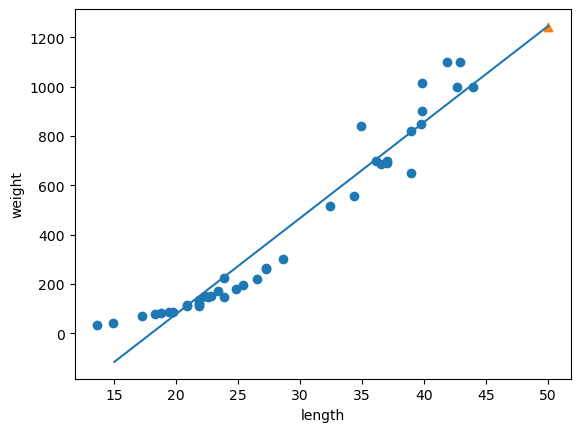

In [ ]:
# 모델 리니어 표현
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*ln.coef_+ln.intercept_, 50*ln.coef_+ln.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [61]:
print(ln.score(train_input, train_target))
print(ln.score(test_input, test_target))

0.9398420162620326
0.8280727595229159


- 테스트 결과가 82%정도로 생각보다 높지 않음
- 그리고 앞서 내가 확인한 것 처럼 이건 2차함수 형태(Polynomial)에 가까움

![alt text](appendix/image-4.png)

In [ ]:
# Polynomial 형태를 위해 데이터 전처리
# 독립변수 값을 제곱한 것, 그냥 값을 각각 넣어 주는것을 알 수 있음
# 3제곱한걸 넣는 방식으로 되는걸 이해 할 수 있음
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input**2, test_input))


#### Polynomial(다항식)
- 2차 방정식인데 그럼 비선형(non-linear) 아닌가? 어떻게 이를 선형 회귀라고 부를 수 있을까요? 
- 사실 **선형 회귀의 선형은** 입력과 타깃 사이의 관계가 아니라 **가중치(계수)와 타깃 사이의 관계**를 의미합니다. 따라서 길이를 제곱하거나 세제곱하더라도 여전히 선형 회귀로 다룰 수 있습니다.(제곱한 feature, 세제곱한 feature가 추가 된것일 뿐) (리니어 임을 증명하는 식 을 찾아서 한번 다루어 보기)

- 즉 위의 식을 기준으로 단순하게 $길이^2$와 $길이$ 두개 가 추가된 다항식에 불과함

In [77]:
print(train_poly)

[[ 376.36     19.4   ]
 [ 476.5489   21.83  ]
 [ 334.89     18.3   ]
 [ 295.84     17.2   ]
 [1303.21     36.1   ]
 [ 616.5289   24.83  ]
 [1578.4729   39.73  ]
 [1518.6609   38.97  ]
 [1820.7289   42.67  ]
 [ 476.5489   21.83  ]
 [ 389.2729   19.73  ]
 [ 476.5489   21.83  ]
 [ 567.8689   23.83  ]
 [ 743.6529   27.27  ]
 [1837.8369   42.87  ]
 [1586.4289   39.83  ]
 [ 567.8689   23.83  ]
 [ 433.8889   20.83  ]
 [ 743.6529   27.27  ]
 [1584.04     39.8   ]
 [1051.7049   32.43  ]
 [ 702.25     26.5   ]
 [1332.25     36.5   ]
 [ 185.7769   13.63  ]
 [ 507.6009   22.53  ]
 [ 222.9049   14.93  ]
 [1366.7809   36.97  ]
 [1220.1049   34.93  ]
 [ 816.2449   28.57  ]
 [ 544.2889   23.33  ]
 [1518.6609   38.97  ]
 [ 433.8889   20.83  ]
 [ 521.2089   22.83  ]
 [ 476.5489   21.83  ]
 [1927.21     43.9   ]
 [ 498.6289   22.33  ]
 [ 353.44     18.8   ]
 [1366.7809   36.97  ]
 [ 476.5489   21.83  ]
 [ 643.6369   25.37  ]
 [1753.0969   41.87  ]
 [1178.5489   34.33  ]]


In [78]:
ln2 = LinearRegression()
ln2.fit(train_poly, train_target)

print(ln2.predict([[50**2, 50]]))

[1585.86194638]


In [79]:
print(ln2.coef_, ln2.intercept_)

[  1.02040384 -21.70576308] 120.14050985550722


$$
무게 = 1.02 \times 길이^2 - 21.7 \times 길이 + 120.1
$$

- 교재와 다른 데이터(내가 직접 추출한)를 사용했기에 값이 어느정도 차이는 있을 수 있음

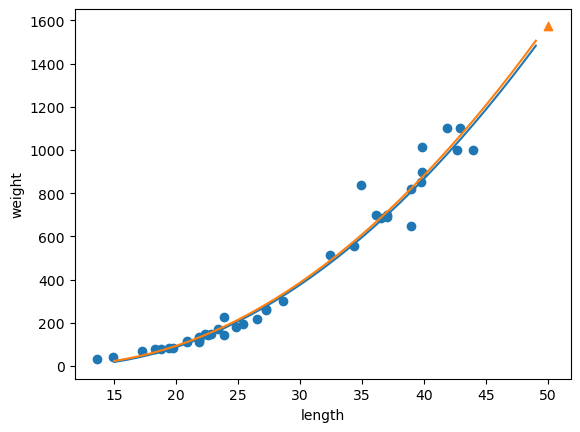

In [81]:
point = np.arange(15, 50)
 # 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
 # 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) # 교재에서의 학습 결과
plt.plot(point, 1.02*point**2 - 21.7*point + 120.01) # 내 데이터 학습 결과
 # 50cm 농어 데이터
plt.scatter(50, 1574, marker='^') 
plt.xlabel('length')
plt.ylabel('weight') 
plt.show()

In [82]:
print(ln2.score(train_poly, train_target))
print(ln2.score(test_poly, test_target))

0.9706886057405776
0.9800936809345473


- 이전 단순 리니어 모델 대비 정확도가 98%로 올라간 것을 확인 할 수 있음

## 03-3 Ridge, Rasso Regression 특성 공학, 규제
- 아래 직선은 feature가 1개, 평면은 feature가 2개 임

![alt text](appendix/image-5.png)

- 이렇게 머릿속으로 그릴 수는 없지만 고차원의 데이터도 표현이 가능
- 기존의 특성을 사용 해 새로운 특성을 뽑아내는 작업을 특성 공학 feature engineering 이라고 함

- 데이터프레임은 넘파이 배열로 쉽게 바꿀 수 있음
- 하지만 사이킷런 1.2 버전부터는 판다스 데이터프레임 자체를 입력 데이터로 사용 -> 하지만 어찌되었건 프로그래밍 된건 `array`로 바꾸는 과정이 들어있음
- 현재 실습에서는 내가 직접 뽑은 `df1_perch` 데이터를 사용

In [86]:
# 이전 데이터는 인덱스가 포함되어서 인덱스 없는 데이터로 생성
df1_perch = df1_perch.reset_index(drop=True)
print(df1_perch)

   Species  Weight  Length   Height   Width
0    Perch     5.9    8.23   2.1120  1.4080
1    Perch    32.0   13.63   3.5280  1.9992
2    Perch    40.0   14.93   3.8240  2.4320
3    Perch    51.5   16.13   4.5924  2.6316
4    Perch    70.0   17.20   4.5880  2.9415
5    Perch   100.0   17.80   5.2224  3.3216
6    Perch    78.0   18.30   5.1992  3.1234
7    Perch    80.0   18.80   5.6358  3.0502
8    Perch    85.0   19.40   5.1376  3.0368
9    Perch    85.0   19.73   5.0820  2.7720
10   Perch   110.0   20.83   5.6925  3.5550
11   Perch   115.0   20.83   5.9175  3.3075
12   Perch   125.0   20.83   5.6925  3.6675
13   Perch   130.0   21.13   6.3840  3.5340
14   Perch   120.0   21.83   6.1100  3.4075
15   Perch   120.0   21.83   5.6400  3.5250
16   Perch   130.0   21.83   6.1100  3.5250
17   Perch   135.0   21.83   5.8750  3.5250
18   Perch   110.0   21.83   5.5225  3.9950
19   Perch   130.0   22.33   5.8560  3.6240
20   Perch   150.0   22.33   6.7920  3.6240
21   Perch   145.0   22.53   5.9

In [103]:
# perch_full 데이터 전처리
perch_full = df1_perch[['Length', 'Height', 'Width']]
perch_weight = np.array(df1_perch['Weight'])

In [107]:
print(perch_full)

    Length   Height   Width
0     8.23   2.1120  1.4080
1    13.63   3.5280  1.9992
2    14.93   3.8240  2.4320
3    16.13   4.5924  2.6316
4    17.20   4.5880  2.9415
5    17.80   5.2224  3.3216
6    18.30   5.1992  3.1234
7    18.80   5.6358  3.0502
8    19.40   5.1376  3.0368
9    19.73   5.0820  2.7720
10   20.83   5.6925  3.5550
11   20.83   5.9175  3.3075
12   20.83   5.6925  3.6675
13   21.13   6.3840  3.5340
14   21.83   6.1100  3.4075
15   21.83   5.6400  3.5250
16   21.83   6.1100  3.5250
17   21.83   5.8750  3.5250
18   21.83   5.5225  3.9950
19   22.33   5.8560  3.6240
20   22.33   6.7920  3.6240
21   22.53   5.9532  3.6300
22   22.83   5.2185  3.6260
23   23.33   6.2750  3.7250
24   23.83   7.2930  3.7230
25   23.83   6.3750  3.8250
26   24.47   6.7334  4.1658
27   24.83   6.4395  3.6835
28   25.37   6.5610  4.2390
29   26.50   7.1680  4.1440
30   27.07   8.3230  5.1373
31   27.27   7.1672  4.3350
32   27.27   7.0516  4.3350
33   27.27   7.2828  4.5662
34   27.77   7.8204 

In [104]:
# 훈련, 테스트 데이터
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런의 클래스
- 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스(사이킷런에서는 변환기; transformer라고 지칭함)를 제공
- 사이킷런의 모델 클래스에 일관된 `fit()`, `score()`, `predict()` 메서드가 있는 것처럼 변환기 클래스는 모두 `fit()`, `transform()` 메서드를 제공
- LinearRegression 같은 사이킷런의 모델 클래스는 추정기(estimator)라고도 부릅

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#### polynomial 연습
- `train_poly`사용

In [100]:
poly = PolynomialFeatures() 
poly.fit([[2, 3]]) 
print(poly.transform([[2, 3]]))
# print(poly.transform[[2, 3]]) -> 내가 잘못 적은거

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
#  include_bias=False로 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시
poly = PolynomialFeatures(include_bias=False) 
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [129]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
poly.get_feature_names_out()

(42, 9)


array(['Length', 'Height', 'Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [130]:
# test 셋 만들어줌
test_poly = poly.transform(test_input)

In [131]:
# 우선적으로 Linear regression
# 종속 변수는 Weight가 들어가고 3개 Feature가 들어가니 4차원상 그려지는 3차원 도형이 산출되는 식이겠네요
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9900905175104371


In [132]:
# 실제 테스트 결과
print(lr.score(test_poly, test_target))

0.9739654829148704


- 내 데이터 상 과대 적합이 나타남..

In [133]:
# polynomial regression
poly = PolynomialFeatures(degree=5, include_bias=False) 
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


- 만들어진 특성의 개수가 무려 55개

In [134]:
# 폴리노미얼 트레이닝 및 결과
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999975481


In [135]:
print(lr.score(test_poly, test_target))

-427.56035493076536


- 과대 적합이 일어나버림.

### 규제regularization
- 머신러닝 모델이 훈련 세트를 과대적합 되지 않도록 함 
- 선형 회귀 모델의 경우 특성에 곱해지는 계수（또는 기울기）의 크기를 작게

- 보통 규제를 하기전 특성의 스케일 조정 즉 데이터 정규화를 먼저 진행


- 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부릅니다. 
#### 릿지, 라쏘
- 릿지는 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘는 계수의 절댓값을 기준 으로 규제를 적용
- 일반적으로 릿지를 조금 더 선호

In [137]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

먼저 StandardScaler 클래스의 객체 ss를 초기화한 후 PolynomialFeatures 클래스로 만든 train_poly를 사용해 이 객체를 훈련

In [138]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9894924778737214


In [139]:
print(ridge.score(test_scaled, test_target))

0.9797102031288507


- 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있음
- 모델 객체를 만들 때 `alpha` 매개변수로 규제의 강도를 조절
- `alpha` 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도합
- `alpha` 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 큽

##### 하이퍼 파라미터
- `alpha` 값은 릿지 모델이 학습하는 값이 아니라 사전에 우리가 지정해야 하는 값
- 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 하이퍼파라미터(hyperparameter)라고 부릅
- 사이킷런과 같은 머신러닝 라이브러리에서 하이퍼 파라미터는 클래스와 메서드의 매개변수로 표현
- 이 책에서는 함수와 클래스의 파라미터는 매개변수라고 하고 모델과 관련된 파라미터(모델 파라미터. 하이퍼파라미터)는 그대로 파라미터라고 표현

##### 릿지

In [143]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
   ridge = Ridge(alpha=alpha)  # 릿지 모델을 만듭니다
 # 릿지 모델을 훈련합니다
   ridge.fit(train_scaled, train_target)
 # 훈련 점수와 테스트 점수를 저장합니다
   train_score.append(ridge.score(train_scaled, train_target)) 
   test_score.append(ridge.score(test_scaled, test_target))

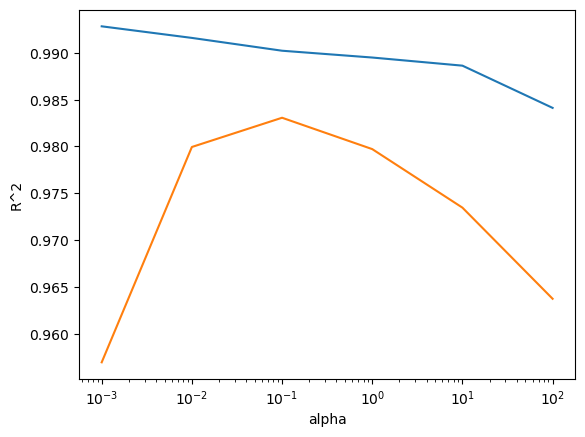

In [ ]:
plt.plot(alpha_list, train_score) # 파란색, 훈련 세트 그래프
plt.plot(alpha_list, test_score) # 노란색, 테스트 세트 그래프
plt.xscale('log') 
plt.xlabel('alpha') 
plt.ylabel('R^2') 
plt.show()

- 그래프의 왼쪽을 보면 훈련 세트와 테스트 세트의 점수 차이가 아주 큼 
- 훈련 세트에는 잘 맞고 테스트 세트에는 형편없는 과대적합의 전형적인 모습이죠. 
- 반대로 오른쪽 편은 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합

In [145]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) 
print(ridge.score(test_scaled, test_target))

0.9902197987325436
0.9830600310107135


##### 라쏘

In [146]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9896787700772429


In [147]:
print(lasso.score(test_scaled, test_target))

0.9805935849852849


In [149]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] 

for alpha in alpha_list:
 # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
 # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
 # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target)) 
    test_score.append(lasso.score(test_scaled, test_target))

/home/user/miniforge3/envs/mldl/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.932e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/user/miniforge3/envs/mldl/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.321e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


###### 위의 경고창
라쏘 모델을 훈련할 때 Convergencewarning이란 경고가 발생할 수 있습니다. 사이킷런의 라쏘 모델은 최적의 계수를 
찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생합니다. 이 반복 횟수를 충분히 늘 
리기 위해 maxjter 매개변수의 값을 10000으로 지정했습니다. 필요하면 더 늘릴 수 있지만 이 문제에서는 큰 영향을 끼 
치지 않습니다

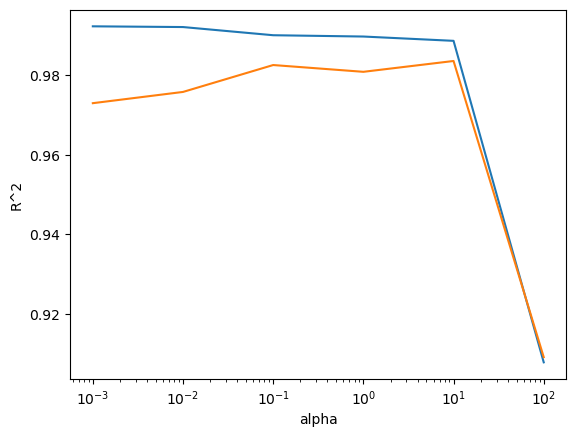

In [151]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score) 
plt.xscale('log')
plt.xlabel('alpha') 
plt.ylabel('R^2') 
plt.show()

- 역시 왼쪽은 과대 적합, 오른쪽으로 갈 수록 크게 점수 떨어짐.

In [153]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target)) 
print(lasso.score(test_scaled, test_target))

0.9886886452539877
0.983037361965146


In [154]:
print(np.sum(lasso.coef_ == 0))

40


### Appendix
#### Series VS DataFrame

In [ ]:
perch_series = df1_perch['Length']
perch_dataframe = df1_perch[['Length']]

# 아래는 시리즈라 에러코드남
# perch_series = df1_perch['Length', 'Weight']